# Lab 3
Exploratory Data Analysis

### Learning objectives
Upon successful completion of this lab, you will have demonstrated the abilities to:
1. Describing numeric and categorical distributions
2. Estimating correlation and association
3. Working with different data types and doing type conversions
4. Working with Strings and String Processing
5. Testing mean differences in groups
6. Visualizing distributions, relationships, and groups




In [1]:
import pandas as pd
customer = pd.read_csv('customer_demographics.csv')
customer.dtypes

,0
Education,object
customer_id,int64
AGE,float64
marital,object
JOB,object


1. Print the first five records from the customer dataframe to get an idea about the data.

In [3]:
customer.head()

,Education,customer_id,AGE,marital,JOB
0,secondary,100103,33.0,married,entrepreneur
1,tertiary,100106,35.0,married,management
2,primary,100118,57.0,married,blue-collar
3,primary,100119,60.0,married,retired
4,secondary,100121,28.0,married,blue-collar


2.Change customer_id type to category. Then print the types of all columns.

In [2]:
customer['customer_id'] = customer['customer_id'].astype('category')
customer.dtypes

,0
Education,object
customer_id,category
AGE,float64
marital,object
JOB,object


3. Convert all the column names to lowercase.

In [3]:
customer.columns = customer.columns.str.lower()
customer.columns

Index(['education', 'customer_id', 'age', 'marital', 'job'], dtype='object')

4. Change the customer_id of the first two records to 1001036.

In [4]:
customer['customer_id'] = customer['customer_id'].cat.add_categories(['1001036'])

customer.loc[0:1, 'customer_id'] = '1001036'
customer.head()

,education,customer_id,age,marital,job
0,secondary,1001036,33.0,married,entrepreneur
1,tertiary,1001036,35.0,married,management
2,primary,100118,57.0,married,blue-collar
3,primary,100119,60.0,married,retired
4,secondary,100121,28.0,married,blue-collar


5.Check if the first customer id matches the pattern.
- Define a pattern that checks for exactly 6 digits in a string
- Compile the 6-digits pattern in a variable p.
- Call the p.match() by passing the first customer id as argument. Use customer.iloc[0,1] which is the customer in the first row of the the dataframe.
- print the return value.

In [7]:
import re

# Define a pattern that checks for exactly 6 digits in a string
pattern = r"^\d{6}$"

# Compile the 6-digits pattern in a variable p.
p = re.compile(pattern)

# Call the p.match() by passing the first customer id as argument.
# Use customer.iloc[0,1] which is the customer in the first row of the the dataframe.
match = p.match(str(customer.iloc[0,1]))

# print the return value.
print(match)


None


6.Check if all customer id values match the pattern.
- Compile the 6-digits pattern in a variable p.
- Use map() function and pass p.match as predicate function/first argument and the customer_id column as second argument.
- Wrap the return value in a list named customer_id_m.
- write a for loop, that will iterate through the matches list (customer_id_m), and print a message if there is no match.

Expected output:

customer id 1001036 in row 1 : does not match the pattern
customer id 10b1036 in row 2 : does not match the pattern

In [8]:
customer_id_m = list(map(p.match, customer['customer_id'].astype(str)))

for i, match in enumerate(customer_id_m):
  if match is None:
    print(f"customer id {customer['customer_id'][i]} in row {i+1} : does not match the pattern")

customer id 1001036 in row 1 : does not match the pattern
customer id 1001036 in row 2 : does not match the pattern


7.Check and treat errors in the education column.
- Display the list of unique values for  education
- lowercase all values under the education column. use mydf[colname].str.lower(). Keep the original column 'education' and add a new column named 'education_lowercase'.
- after lowercasing, display the list of unique values for  education_lowercase column.

In [9]:
print(customer['education'].unique())
customer['education_lowercase'] = customer['education'].str.lower()
print(customer['education_lowercase'].unique())

['secondary' 'tertiary' 'primary' 'unknown' 'SECONDARY']
['secondary' 'tertiary' 'primary' 'unknown']


9.Copy values between columns and Drop columns
- Assign the education_lower values to education.
- drop the education_lowercase column
- show the top rows of the dataset.

In [10]:
customer['education'] = customer['education_lowercase']
customer = customer.drop('education_lowercase', axis=1)
customer.head()

,education,customer_id,age,marital,job
0,secondary,1001036,33.0,married,entrepreneur
1,tertiary,1001036,35.0,married,management
2,primary,100118,57.0,married,blue-collar
3,primary,100119,60.0,married,retired
4,secondary,100121,28.0,married,blue-collar


9.Find and correct errors in the job column.  
- show the list of unique values under the job column. Use value_counts() method.
- admin. and ADMINISTRATION should refer to the same category level. replace all ADMINISTRATION occurrences with 'admin.' Use the replace() method. syntax: mydataframe.columnname.replace(oldvalue, newvalue)
- after you make the changes, show again the list of unique values under the job column.

ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.replace.html?highlight=replace#pandas.DataFrame.replace

In [11]:
print(customer['job'].value_counts())
customer['job'] = customer['job'].replace('ADMINISTRATION', 'admin.')
print(customer['job'].value_counts())

job
management        2391
blue-collar       1914
technician        1768
admin.            1134
services           850
retired            757
student            375
self-employed      367
unemployed         353
entrepreneur       291
housemaid          262
unknown             65
ADMINISTRATION      51
Name: count, dtype: int64
job
management       2391
blue-collar      1914
technician       1768
admin.           1185
services          850
retired           757
student           375
self-employed     367
unemployed        353
entrepreneur      291
housemaid         262
unknown            65
Name: count, dtype: int64


10. Add a new column to the dataframe by taking the first 3 letters of the marital column.
- Note: you should lowercase all values for the marital column.


In [12]:
print(customer['marital'].value_counts())
customer['marital'] = customer['marital'].str.lower()
customer['marital_3'] = customer['marital'].str[:3]
print(customer['marital'].value_counts())
customer.head()

marital
married     5942
single      3393
divorced    1185
DIVORCED      58
Name: count, dtype: int64
marital
married     5942
single      3393
divorced    1243
Name: count, dtype: int64


,education,customer_id,age,marital,job,marital_3
0,secondary,1001036,33.0,married,entrepreneur,mar
1,tertiary,1001036,35.0,married,management,mar
2,primary,100118,57.0,married,blue-collar,mar
3,primary,100119,60.0,married,retired,mar
4,secondary,100121,28.0,married,blue-collar,mar


11.Add a dummy variable
- Add a new column marital_b to the dataframe that takes the value 0 if marital is single, 1 if marital is married and 2 if marital is divorced.
- Hint: use the replace method on the required column and pass a dictionary of oldValue:newValue items for replacement.  


In [13]:
marital_mapping = {'single': 0, 'married': 1, 'divorced': 2}
customer['marital_b'] = customer['marital'].replace(marital_mapping)
customer.head()

,education,customer_id,age,marital,job,marital_3,marital_b
0,secondary,1001036,33.0,married,entrepreneur,mar,1
1,tertiary,1001036,35.0,married,management,mar,1
2,primary,100118,57.0,married,blue-collar,mar,1
3,primary,100119,60.0,married,retired,mar,1
4,secondary,100121,28.0,married,blue-collar,mar,1


12.Customized binning
- add a new column age_group based on age. If age is <35, age_group is set to young. if age between 36 and 55, the age_group is set to 'middle'. if age is >55, age_group is set to 'senior'.

    Use conditional assignment: https://datatofish.com/if-condition-in-pandas-dataframe/

This is the general structure that you may use to create the IF condition:

    df.loc[df['column name'] condition, 'new column name'] = 'value if condition is met'

In [14]:
customer.loc[customer['age'] <= 35, 'age_group'] = 'young'
customer.loc[(customer['age'] >= 36) & (customer['age'] <= 55), 'age_group'] = 'middle'
customer.loc[customer['age'] > 55, 'age_group'] = 'senior'
customer.head()

,education,customer_id,age,marital,job,marital_3,marital_b,age_group
0,secondary,1001036,33.0,married,entrepreneur,mar,1,young
1,tertiary,1001036,35.0,married,management,mar,1,young
2,primary,100118,57.0,married,blue-collar,mar,1,senior
3,primary,100119,60.0,married,retired,mar,1,senior
4,secondary,100121,28.0,married,blue-collar,mar,1,young


13.Download the Boston Housing dataset from https://www.kaggle.com/datasets/arunjangir245/boston-housing-dataset
Read the csv file into a dataframe called boston.
Print the first 5 records from the boston dataframe.

In [15]:
boston = pd.read_csv('BostonHousing.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


14.Show the quantile table for the numerical columns of boston dataset using the quantile() function.

In [16]:
boston.quantile([0.25, 0.5, 0.75])

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0.25,0.082045,0.0,5.19,0.0,0.449,5.884,45.025,2.100175,4.0,279.0,17.40,375.3775,6.950,17.025
0.50,0.256510,0.0,9.69,0.0,0.538,6.208,77.500,3.207450,5.0,330.0,19.05,391.4400,11.360,21.200
0.75,3.677083,12.5,18.10,0.0,0.624,6.625,94.075,5.188425,24.0,666.0,20.20,396.2250,16.955,25.000


15.Show the summary statistics of boston dataset using the describe() function

In [36]:
boston.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,501.0,6.284341,0.705587,3.56100,5.884000,6.20800,6.625000,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


16.First run the following command
print(boston.shape) and copy the result

We will now do the equal-sized binning:

create a new dataframe boston_binned, result of equal-sized binning of all the numerical columns in boston dataset given the percentile points in the quantile table.
Use a for loop to iterate over the columns in boston dataset, and call qcut for binning each of the columns.

Refer to: ch13: exploring data analysis, page 4(Python for Data Science for Dummies, 2nd Edition), section: counting for categorical Data.

print the first 5 rows of boston_binned dataset using the head() function.

In [19]:
print(boston.shape)
boston_binned = boston.copy()

# Apply qcut to each numerical column in the dataset
for column in boston_binned.select_dtypes(include='number').columns:
    # Binning into equal-sized bins (quartiles)
    boston_binned[column] = pd.qcut(boston_binned[column], q=4, labels=False, duplicates='drop')

boston_binned.head()


(506, 14)


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0,1,0,0,1,2.0,1,2,0,1,0,3,0,2
1,0,0,1,0,1,2.0,2,2,0,0,1,3,1,2
2,0,0,1,0,1,3.0,1,2,0,0,1,2,0,3
3,0,0,0,0,1,3.0,1,3,0,0,1,2,0,3
4,0,0,0,0,1,3.0,1,3,0,0,1,3,0,3


17.Show the frequency table for the variable CRIM in boston_binned. Use value_counts() function.

In [20]:
boston_binned['crim'].value_counts()

,count
crim,
0,127
3,127
1,126
2,126


18.Study the relationship between CRIM and MEDV categorical variables in boston_binned dataframe.

In [21]:
boston_binned['crim'].corr(boston_binned['medv'])

-0.5091398678576834

19.calculate the chi-square and the associated p-value betweeb CRIM and MEDV in boston_binned dataframe.

In [22]:
from scipy.stats import chi2_contingency

chi_square, p_value, dof, expected = chi2_contingency(pd.crosstab(boston_binned['crim'], boston_binned['medv']))
print(f"Chi-square value: {chi_square}")
print(f"P-value: {p_value}")

Chi-square value: 195.96280715687166
P-value: 2.3238405860709773e-37


In [ ]:
'''
20.Below are the intervals for the variable MEDV in boston_binned dataframe.
    1. define a dictionary palette of interval names as keys and colors of your choice as values.
    2. print the dictionary

In [23]:
palette = {
    0: 'blue',
    1: 'green',
    2: 'orange',
    3: 'red'
}

medv_value_counts = boston_binned['medv'].value_counts()
palette

{0: 'blue', 1: 'green', 2: 'orange', 3: 'red'}

21.Plotting scatterplots:
    1. display a scatter chart with the MEDV on the y axis and DIS on the x axis. Highlight the different intervals of MEDV with different colors.
    3. interpret the scatter plot.  
    reuse code in ch13, page 7, section: Plotting Scatterplots from Python for Data Science for Dummies, 2nd Edition.

<Axes: xlabel='dis', ylabel='medv'>

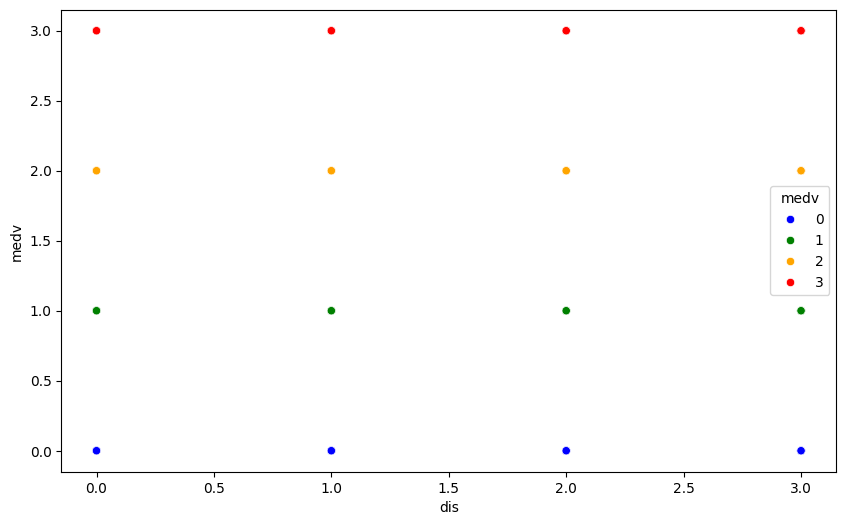

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=boston_binned, x='dis', y='medv', hue='medv', palette=palette)


'''
Interpretation of the Scatter Plot: The x-axis represents the distance to employment centers (DIS), while the y-axis represents the binned median home values (MEDV) in four intervals. The different colors represent the four quartiles (bins) of MEDV: Blue: Lowest quartile (lowest median home values). Green: Second quartile. Orange: Third quartile. Red: Highest quartile (highest median home values).

As DIS increases (meaning homes are farther away from employment centers), higher MEDV bins (represented by green, orange, and red colors) are more prevalent. This suggests that houses located farther from employment centers tend to have higher median values.
'''

22.plotting scatterplots:
    1. display a scatter chart with the MEDV on the y axis and DIS on the x axis. Highlight the different intervals of MEDV with different colors.
    3. interpret the scatter plot.  
    reuse code in ch13, page 7, section: Plotting Scatterplots from Python for Data Science for Dummies, 2nd Edition.

<Axes: xlabel='dis', ylabel='medv'>

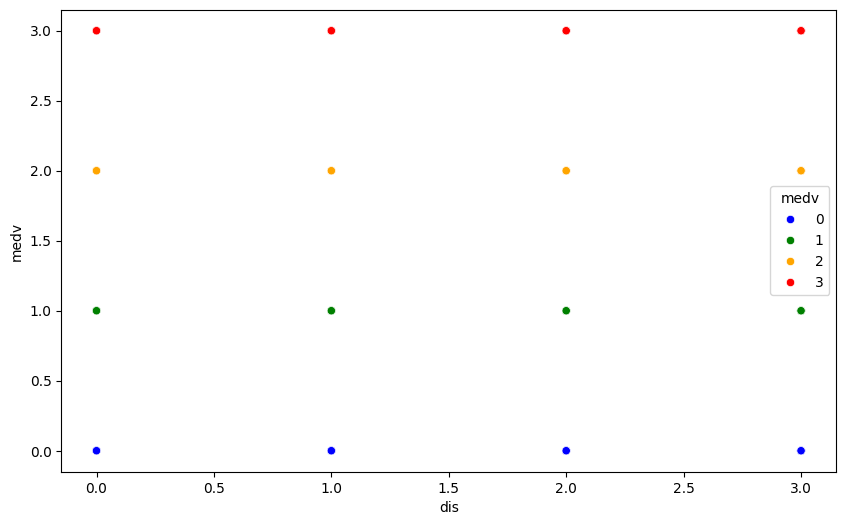

In [59]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=boston_binned, x='dis', y='medv', hue='medv', palette=palette)

**Interpretation of the Scatter Plot**:
The x-axis represents the distance to employment centers (DIS), while the y-axis represents the binned median home values (MEDV) in four intervals.
The different colors represent the four quartiles (bins) of MEDV:
Blue: Lowest quartile (lowest median home values).
Green: Second quartile.
Orange: Third quartile.
Red: Highest quartile (highest median home values).


As DIS increases (meaning homes are farther away from employment centers), higher MEDV bins (represented by green, orange, and red colors) are more prevalent. This suggests that houses located farther from employment centers tend to have higher median values.

23.display a scatter matrix with only the following variables:
CRIM, ZN, INDUS, RM and MEDV.

<Figure size 1000x1000 with 0 Axes>

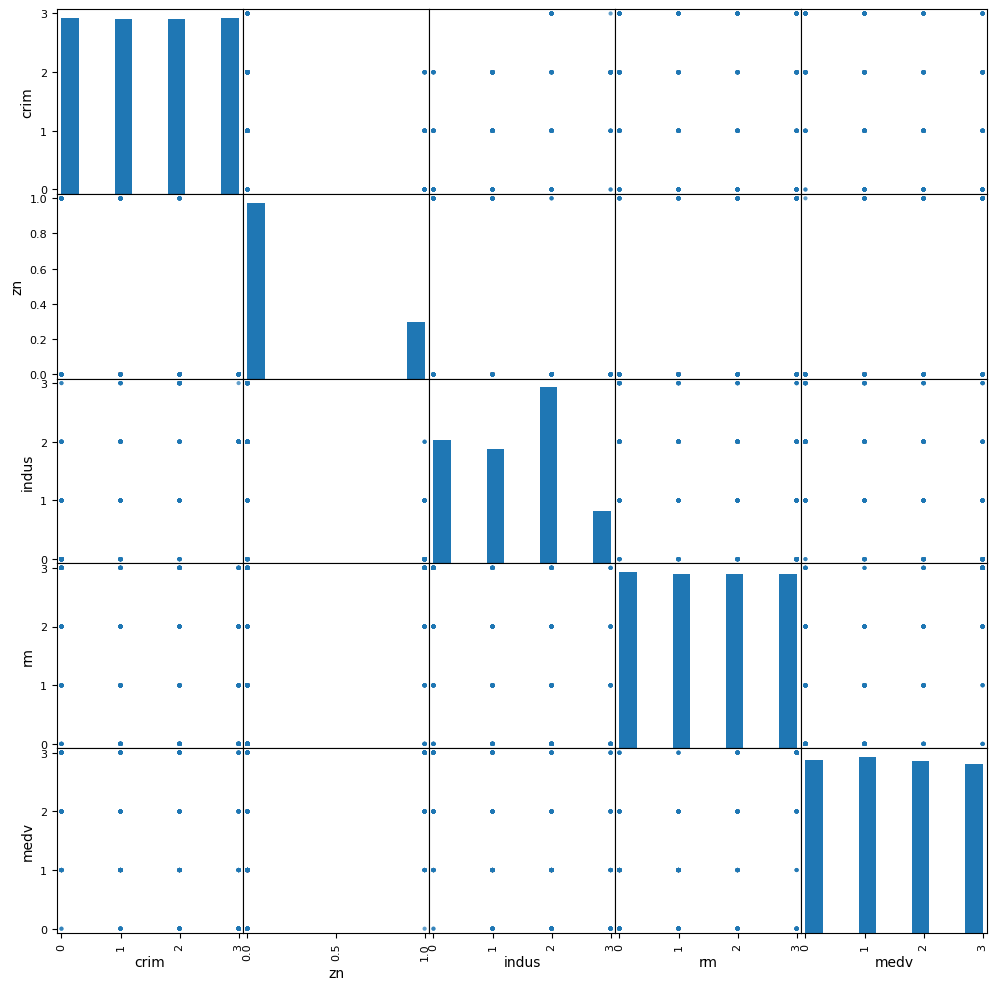

In [25]:
from pandas.plotting import scatter_matrix

selected_columns = boston_binned[['crim', 'zn', 'indus', 'rm', 'medv']]

plt.figure(figsize=(10, 10))
scatter_matrix(selected_columns, alpha=0.7, figsize=(12, 12), diagonal='hist')
plt.show()